# Exploring the Seattle lifestyle through Airbnb lens

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA

This project is divided in 5 sections
1. Introduction
2. Exploring Data
        2.1 The Data
3. Exploratory Data Analysis(EDA)
        3.1 Describing Features
        3.2 Descriptive Figures
            3.2.1 Distribution Plots
            3.2.2 
        3.3 Feature Engineering
4. Model Selection
        4.1 Data Preparation: Train and Test set
        4.2 Model Selection: Logistic Regression
5. Actionable Recommendations

# 1. Introduction
While looking at dataset to explore on Seattle, I looked on [Kaggle](www.kaggle.com) and found [Seattle Airbnb Open Data](https://www.kaggle.com/airbnb/seattle/data) Without any further thinking, I downloaded the dataset and started to explore it.

Before I started to explore the dataset,I had three questions in my mind to which I wanted to find answers.
1. What are the top 5 factors affecting which cause the rise in rent prices?
2. Which is the Peak Season and Off Season to visit Seattle in this year?
3. Who are the Top Hosts based on User Reviews and in which neighbourhoods are their properties located?

Can you describe the vibe of each Seattle neighborhood using listing descriptions?
What are the busiest times of the year to visit Seattle? By how much do prices spike?
Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?

In [1]:
# Importing librairies
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, make_scorer, fbeta_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
%matplotlib inline 

In [2]:
# Importing csv files for initial review
# Loading the data
df_calendar = pd.read_csv('./calendar.csv')
df_listings = pd.read_csv('./listings.csv')
df_reviews = pd.read_csv('./reviews.csv')

In [6]:
# Checking the shape of datasets
print("Shape of Calendar dataset:",df_calendar.shape);
print("Shape of Listings dataset:",df_listings.shape);
print("Shape of Reviews dataset:",df_reviews.shape);

Shape of Calendar dataset: (1393570, 4)
Shape of Listings dataset: (3818, 92)
Shape of Reviews dataset: (84849, 6)


In [9]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [11]:
df_listings['calendar_last_scraped'].value_counts()

2016-01-04    3818
Name: calendar_last_scraped, dtype: int64

In [17]:
print(("Rows %s and Columns %s")%(df_listings.shape[0], df_listings.shape[1]))

Rows 3818 and Columns 92


In [22]:
df_listings.host_id.value_counts().nlargest()

8534462    46
4962900    39
1243056    37
430709     36
3074414    34
Name: host_id, dtype: int64

In [31]:
df_listings[df_listings.host_id==8534462].head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1077,3380159,https://www.airbnb.com/rooms/3380159,20160104002432,2016-01-04,Pike's Place. 100 Walkscore,"With a 100% Walk-Score, this spacious 1BD apar...","With a 100% Walk-Score, this spacious 1BD apar...","With a 100% Walk-Score, this spacious 1BD apar...",none,NaN,...,9.0,f,NaN,WASHINGTON,f,strict,t,t,3,2.71
1149,6913706,https://www.airbnb.com/rooms/6913706,20160104002432,2016-01-04,Westlake Ave Downtown Condos 1BD,98 Walkscore unit on a high floor right downto...,*About the Neighborhood* The neighborhood is r...,98 Walkscore unit on a high floor right downto...,none,NaN,...,9.0,f,NaN,WASHINGTON,f,strict,t,t,3,3.11
1152,9885225,https://www.airbnb.com/rooms/9885225,20160104002432,2016-01-04,Westlake Ave Downtown Condos 1BD 4,"98 Walkscore Penthouse unit on the top floor, ...",NaN,"98 Walkscore Penthouse unit on the top floor, ...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,strict,t,t,3,NaN
1155,6990477,https://www.airbnb.com/rooms/6990477,20160104002432,2016-01-04,Westlake Ave Downtown Condos 1BD 2,98 Walkscore unit on a high floor right downto...,Other units in the same building: https://www...,98 Walkscore unit on a high floor right downto...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,3,4.24
1159,7840228,https://www.airbnb.com/rooms/7840228,20160104002432,2016-01-04,Westlake Ave Downtown Condos 1BD 3,"98 Walkscore Penthouse unit on the top floor, ...",*About the Neighborhood* The neighborhood is r...,"98 Walkscore Penthouse unit on the top floor, ...",none,NaN,...,9.0,f,NaN,WASHINGTON,f,strict,t,t,3,1.27


In [32]:
df_listings[df_listings.host_id==4962900].head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1065,936484,https://www.airbnb.com/rooms/936484,20160104002432,2016-01-04,Marketside Flats next to Pike! MS1,The Marketside Flats is a fantastic home base ...,LOCATED RIGHT NEXT TO PIKE PLACE MARKET!!! You...,The Marketside Flats is a fantastic home base ...,none,In the heart of Downtown Seattle! Nearby Attra...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.46
1067,938785,https://www.airbnb.com/rooms/938785,20160104002432,2016-01-04,Best Ocean Views By Pike Place! PA1,Post Alley Court offers amazing views of Ellio...,"Water views from balcony, only 1/2 block to Pi...",Post Alley Court offers amazing views of Ellio...,none,In the heart of Downtown Seattle! Nearby Attra...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.63
1068,934216,https://www.airbnb.com/rooms/934216,20160104002432,2016-01-04,Amazing Waterview! PIKE PLACE! HSW,"One block from Pike Place Market, the best of ...",UNIT HAS BEEN RENOVATED! UPDATED PICS COMING S...,"One block from Pike Place Market, the best of ...",none,In the heart of Downtown Seattle! Nearby Attra...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.68
1209,4410493,https://www.airbnb.com/rooms/4410493,20160104002432,2016-01-04,Heart of Downtown Seattle! SH2,The Shelby is centrally located at the interse...,Life at the Shelby is about enjoying everythin...,The Shelby is centrally located at the interse...,none,In the heart of Downtown Seattle! Nearby Attra...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.81
1265,5446176,https://www.airbnb.com/rooms/5446176,20160104002432,2016-01-04,"Amazing Location, Great Dining! V62",Via6 is downtown Seattle's hottest new vertica...,Via6 in Seattle is a brand new property for us...,Via6 is downtown Seattle's hottest new vertica...,none,In the heart of Downtown Seattle! Nearby Attra...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,1.40


In [35]:
df_listings[df_listings.price==np.max(df_listings.price)].head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1208,3345341,https://www.airbnb.com/rooms/3345341,20160104002432,2016-01-04,100% Walk Score 1-BR Downtown,100% Walk Score close to the Convention Center...,The space seeks to feel like home while giving...,100% Walk Score close to the Convention Center...,none,This neighborhood is AWESOME! We are: - 1 stre...,...,9.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.89


In [42]:
df_listings.price.value_counts().nlargest()

$150.00    162
$100.00    159
$75.00     118
$99.00     110
$95.00     110
Name: price, dtype: int64

In [61]:
(df_listings['price'].strip('$'))

NameError: name 'Decimal' is not defined

In [51]:
list(df_listings.price.unique())

['$85.00',
 '$150.00',
 '$975.00',
 '$100.00',
 '$450.00',
 '$120.00',
 '$80.00',
 '$60.00',
 '$90.00',
 '$95.00',
 '$99.00',
 '$245.00',
 '$165.00',
 '$461.00',
 '$109.00',
 '$66.00',
 '$200.00',
 '$700.00',
 '$110.00',
 '$75.00',
 '$600.00',
 '$45.00',
 '$300.00',
 '$175.00',
 '$325.00',
 '$222.00',
 '$159.00',
 '$125.00',
 '$348.00',
 '$148.00',
 '$350.00',
 '$349.00',
 '$160.00',
 '$130.00',
 '$137.00',
 '$20.00',
 '$145.00',
 '$400.00',
 '$70.00',
 '$170.00',
 '$465.00',
 '$50.00',
 '$59.00',
 '$47.00',
 '$55.00',
 '$65.00',
 '$25.00',
 '$40.00',
 '$149.00',
 '$129.00',
 '$105.00',
 '$218.00',
 '$126.00',
 '$115.00',
 '$225.00',
 '$89.00',
 '$134.00',
 '$375.00',
 '$97.00',
 '$197.00',
 '$135.00',
 '$180.00',
 '$69.00',
 '$195.00',
 '$224.00',
 '$338.00',
 '$79.00',
 '$49.00',
 '$57.00',
 '$96.00',
 '$295.00',
 '$53.00',
 '$35.00',
 '$133.00',
 '$61.00',
 '$52.00',
 '$275.00',
 '$199.00',
 '$435.00',
 '$250.00',
 '$116.00',
 '$39.00',
 '$98.00',
 '$73.00',
 '$190.00',
 '$68.00',
 

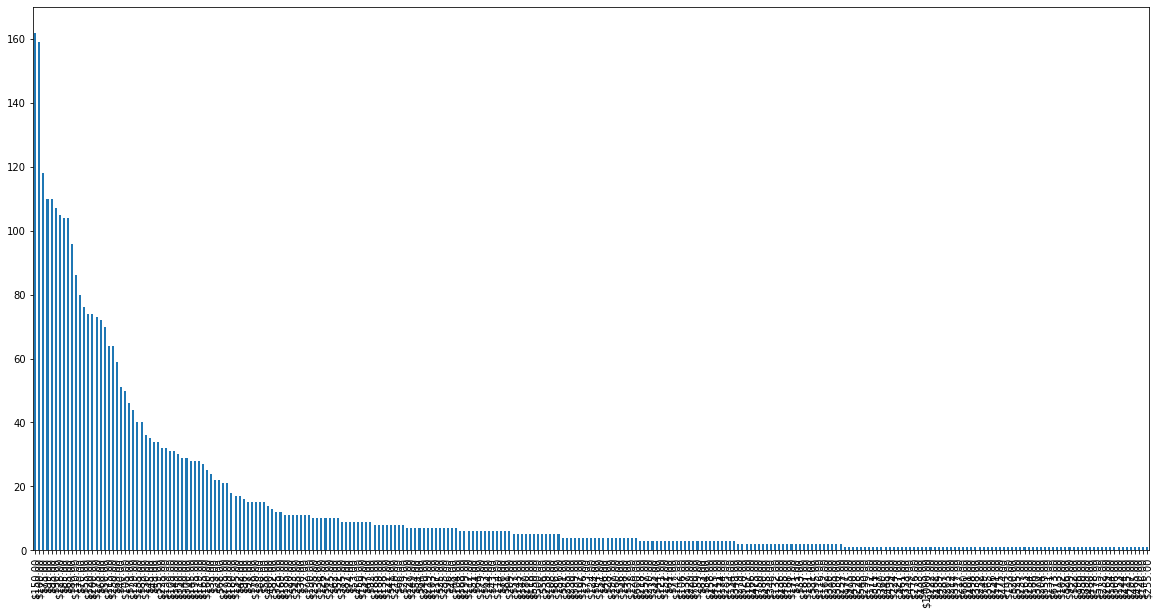

In [71]:
# plt.hist(df_listings[df_listings.price == np.max(df_listings.price)], bins=5);
fig, ax = plt.subplots(figsize=(20, 10))
df_listings['price'].value_counts().plot(kind='bar');

In [49]:
df_listings['review_scores_value'].head()

0    10.0
1    10.0
2    10.0
3     NaN
4     9.0
Name: review_scores_value, dtype: float64

In [47]:
pd.to_numeric(df_listings['price']).head()

ValueError: Unable to parse string "$85.00" at position 0

In [44]:
df_listings[df_listings['price'].astype('int64') > 150].head()

ValueError: invalid literal for int() with base 10: '$85.00'

In [27]:
df_listings.city.value_counts().nlargest()

Seattle             3810
West Seattle           2
Seattle                2
seattle                1
Ballard, Seattle       1
Name: city, dtype: int64

In [23]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [6]:
df.available.value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [7]:
df.date.max()

'2017-01-02'

In [8]:
df.date.min()

'2016-01-04'

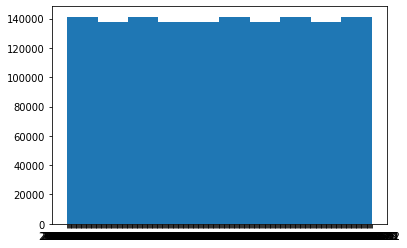

In [10]:
plt.hist(df['date'])
plt.show()

In [11]:
df.date.nunique()

365

In [12]:
df.shape[0]/df.date.nunique()

3818.0

In [14]:
df.price.isnull().mean()

0.32938998399793334

In [17]:
df.listing_id.nunique()

3818

In [20]:
df_listings.shape

(3818, 92)

In [21]:
df_calendar.shape

(1393570, 4)

In [22]:
df_reviews.shape

(84849, 6)

In [23]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [24]:
list(df_listings.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


In [27]:
df_listings.loc[:,('id', 'host_name')].head()

,id,host_name
0,241032,Maija
1,953595,Andrea
2,3308979,Jill
3,7421966,Emily
4,278830,Emily


In [28]:
df_listings.shape

(3818, 92)

In [40]:
df_listings.groupby(['host_id']).count()['id'].nlargest()

host_id
8534462    46
4962900    39
1243056    37
430709     36
3074414    34
Name: id, dtype: int64

In [41]:
df_listings.shape[0]

3818

In [66]:
df_listings.loc[df_listings.host_id == 8534462, (['id', 'host_id', 'host_name', 'host_location', 'description'])]

,id,host_id,host_name,host_location,description
1077,3380159,8534462,Daniela,"Seattle, Washington, United States","With a 100% Walk-Score, this spacious 1BD apar..."
1149,6913706,8534462,Daniela,"Seattle, Washington, United States",98 Walkscore unit on a high floor right downto...
1152,9885225,8534462,Daniela,"Seattle, Washington, United States","98 Walkscore Penthouse unit on the top floor, ..."
1155,6990477,8534462,Daniela,"Seattle, Washington, United States",98 Walkscore unit on a high floor right downto...
1159,7840228,8534462,Daniela,"Seattle, Washington, United States","98 Walkscore Penthouse unit on the top floor, ..."
1230,6766708,8534462,Daniela,"Seattle, Washington, United States","With an unbeatable 100 Walkscore, this luxurio..."
1237,5874421,8534462,Daniela,"Seattle, Washington, United States",Right at the heart of Seattle's fastest-growin...
1238,8829474,8534462,Daniela,"Seattle, Washington, United States",*Clear View of New Year's Eve Space Needle Fir...
1278,4569115,8534462,Daniela,"Seattle, Washington, United States",Comfortable 2Bed in Belltown. Close to the Spa...
1298,9497431,8534462,Daniela,"Seattle, Washington, United States",Best place to ring in the new year with the *b...


In [47]:
df_listings['host_id'].head()

0      956883
1     5177328
2    16708587
3     9851441
4     1452570
Name: host_id, dtype: int64

In [64]:
df_listings['host_location'].value_counts().head(10)

Seattle, Washington, United States          3259
US                                           246
Spokane, Washington, United States            41
Kent, Washington, United States               34
Los Angeles, California, United States        13
Bellevue, Washington, United States           12
San Francisco, California, United States      11
Mercer Island, Washington, United States      10
Kirkland, Washington, United States            8
New York, New York, United States              6
Name: host_location, dtype: int64

In [72]:
df_listings.loc[1077,:]

id                                                               3380159
listing_url                         https://www.airbnb.com/rooms/3380159
scrape_id                                                 20160104002432
last_scraped                                                  2016-01-04
name                                         Pike's Place. 100 Walkscore
                                                    ...                 
cancellation_policy                                               strict
require_guest_profile_picture                                          t
require_guest_phone_verification                                       t
calculated_host_listings_count                                         3
reviews_per_month                                                   2.71
Name: 1077, Length: 92, dtype: object

In [74]:
df_listings['host_id'].value_counts().nlargest()

8534462    46
4962900    39
1243056    37
430709     36
3074414    34
Name: host_id, dtype: int64

In [77]:
df_listings[df_listings.id == 7421966]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
